In [109]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import matplotlib.pyplot as plt

In [111]:
data = pd.read_csv('dava_sonuclari.csv')
data.head()

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
0,Criminal,221,39,18,24306,2,663160,3,1,29014,1,0
1,Civil,212,14,1,42444,3,252011,67,4,21591,1,0
2,Civil,47,6,19,21418,1,307309,66,6,25530,3,0
3,Commercial,358,13,9,45005,3,285111,63,1,28470,1,0
4,Criminal,33,17,17,36315,2,84229,38,2,38244,2,0


In [113]:
# ## VERİ SETİ İNCELEME : 
# Case Type: Davanın türü (Criminal, Civil, Commercial)  
# Case Duration (Days): Davanın süresi (gün olarak)  
# Judge Experience (Years): Hakimin deneyim yılı  
# Number of Witnesses: Tanık sayısı  
# Legal Fees (USD): Hukuk masrafları (USD olarak)  
# Plaintiff's Reputation: Davacının itibarı (1: Düşük, 2: Orta, 3: Yüksek)  
# Defendant's Wealth (USD): Davalının serveti  
# Number of Evidence Items: Delil sayısı  
# Number of Legal Precedents: İlgili hukuki emsal sayısı  
# Settlement Offered (USD): Teklif edilen uzlaşma miktarı  
# Severity: Davanın ciddiyet derecesi (1: Düşük, 2: Orta, 3: Yüksek)  
# Outcome: Davanın sonucu (0: Kaybetmek, 1: Kazanmak)  

In [115]:
# ## Görevler 
# ### Veri Ön İşleme:
# Veri setini inceleyin ve eksik veya aykırı değerler olup olmadığını kontrol edin.  
data.isna()

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False


In [117]:
#Gerektiğinde eksik verileri doldurun veya çıkarın.  
data = data.dropna()
data

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
0,Criminal,221,39,18,24306,2,663160,3,1,29014,1,0
1,Civil,212,14,1,42444,3,252011,67,4,21591,1,0
2,Civil,47,6,19,21418,1,307309,66,6,25530,3,0
3,Commercial,358,13,9,45005,3,285111,63,1,28470,1,0
4,Criminal,33,17,17,36315,2,84229,38,2,38244,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Commercial,224,9,1,22779,3,463084,28,7,258,3,0
196,Criminal,164,29,14,14944,1,421387,61,9,4961,1,0
197,Civil,66,20,9,44153,2,652616,11,1,5700,2,0
198,Civil,221,4,18,32428,2,611919,28,6,22754,3,0


In [119]:
# ### Veri Setini Ayırma:
# * Veri setini eğitim ve test setleri olarak ayırın (örn. %80 eğitim, %20 test).  
x = data.drop("Outcome", axis=1)
y = data["Outcome"]

x = pd.get_dummies(x, columns=["Case Type"], drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)           
print("Eğitim veri boyutu:", x_train.shape, y_train.shape)
print("Test veri boyutu:", x_test.shape, y_test.shape)


Eğitim veri boyutu: (160, 12) (160,)
Test veri boyutu: (40, 12) (40,)


In [121]:
# ### Model Kurulumu:
# * Karar ağacı modelini oluşturun ve eğitim verileri üzerinde eğitin.
# Karar ağacı sınıflandırıcı oluştur
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

In [123]:
# ### Modeli Değerlendirme:
# * Test verilerini kullanarak modelin doğruluğunu değerlendirin.
# * Doğruluk, precision, recall ve F1-score gibi performans metriklerini hesaplayın.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
dt_pred = dt.predict(x_test)

# Doğruluk (accuracy)
accuracy = accuracy_score(y_test, dt_pred)
print("Doğruluk (Accuracy):", accuracy)

# Precision
precision = precision_score(y_test, dt_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, dt_pred)
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test,dt_pred)
print("F1-score:", f1)


Doğruluk (Accuracy): 1.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


C:\Users\senem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\senem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\senem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


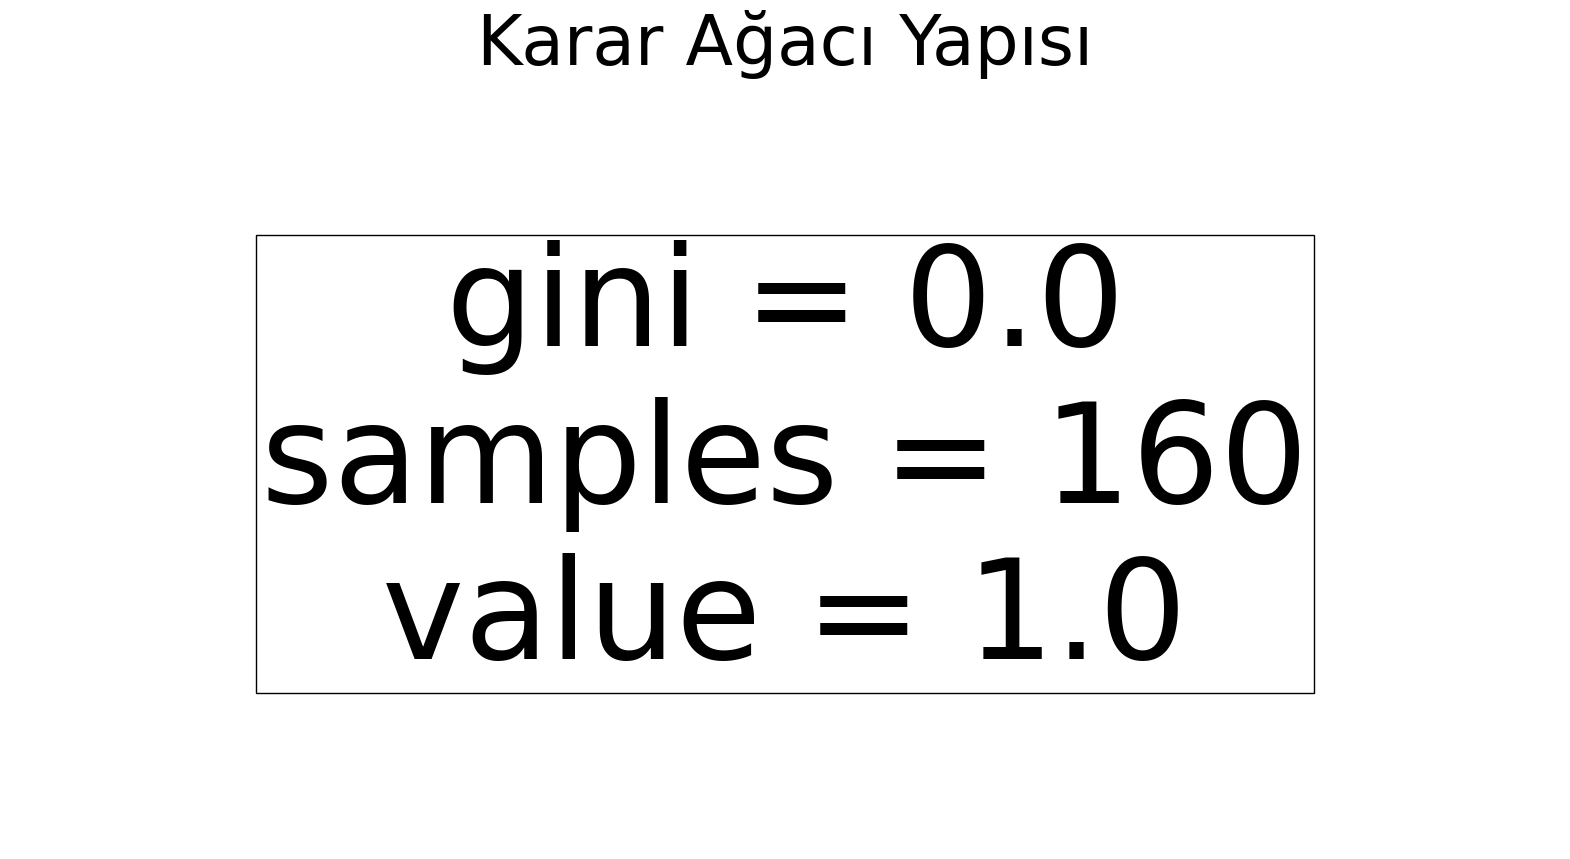

In [125]:
# ### Sonuçları Görselleştirme:
# Karar ağacının yapısını görselleştirin.
plt.figure(figsize=(20,10))  
tree.plot_tree(
    dt, 
    feature_names=x.columns,       
    class_names=['0', '1'],                      
    fontsize=100
)
plt.title("Karar Ağacı Yapısı", fontsize=50)
plt.show()
